In [83]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
import json
import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [84]:
import pandas as pd
import numpy as np
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [85]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [86]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [87]:
df2.shape


(4803, 23)

In [88]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [89]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [90]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [91]:
df2[df2['original_title'] != df2['title']][['title', 'original_title']].head()


,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


In [92]:
df2 = df2.drop('original_title', axis=1)


In [93]:
df2[df2['revenue'] == 0].shape


(1427, 22)

In [94]:
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')
df2['budget'] = df2['budget'].replace(0, np.nan)
df2[df2['budget'].isnull()].shape

(1037, 22)

In [95]:
# q_movies = df2.copy().loc[df2['vote_count'] >= v]
# q_movies.shape

In [96]:
df2['return'] = df2['revenue'] / df2['budget']
df2[df2['return'].isnull()].shape

(1037, 23)

In [97]:
df2['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
5       2007-05-01
6       2010-11-24
7       2015-04-22
8       2009-07-07
9       2016-03-23
10      2006-06-28
11      2008-10-30
12      2006-06-20
13      2013-07-03
14      2013-06-12
15      2008-05-15
16      2012-04-25
17      2011-05-14
18      2012-05-23
19      2014-12-10
20      2012-06-27
21      2010-05-12
22      2013-12-11
23      2007-12-04
24      2005-12-14
25      1997-11-18
26      2016-04-27
27      2012-04-11
28      2015-06-09
29      2012-10-25
           ...    
4773    1994-09-13
4774    1971-01-01
4775    2002-09-20
4776    1997-01-19
4777    2002-01-15
4778    2009-08-14
4779    1990-07-27
4780    2015-10-02
4781    2013-02-14
4782    2003-01-01
4783    2015-01-16
4784    2005-01-17
4785    2014-09-05
4786    2009-03-14
4787    2011-10-26
4788    1972-03-12
4789    2004-09-01
4790    2000-09-08
4791    2007-01-01
4792    1997-11-06
4793    2004-04-11
4794    2012

In [98]:
df2['production_countries']

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
5       [{"iso_3166_1": "US", "name": "United States o...
6       [{"iso_3166_1": "US", "name": "United States o...
7       [{"iso_3166_1": "US", "name": "United States o...
8       [{"iso_3166_1": "GB", "name": "United Kingdom"...
9       [{"iso_3166_1": "US", "name": "United States o...
10      [{"iso_3166_1": "US", "name": "United States o...
11      [{"iso_3166_1": "GB", "name": "United Kingdom"...
12      [{"iso_3166_1": "JM", "name": "Jamaica"}, {"is...
13      [{"iso_3166_1": "US", "name": "United States o...
14      [{"iso_3166_1": "GB", "name": "United Kingdom"...
15      [{"iso_3166_1": "CZ", "name": "Czech Republic"...
16      [{"iso_3166_1": "US", "name": "United States o...
17      [{"iso

In [99]:
df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [100]:
df2['title'] = df2['title'].astype('str')
df2['overview'] = df2['overview'].astype('str')


In [101]:
title_corpus = ' '.join(df2['title'])
overview_corpus = ' '.join(df2['overview'])

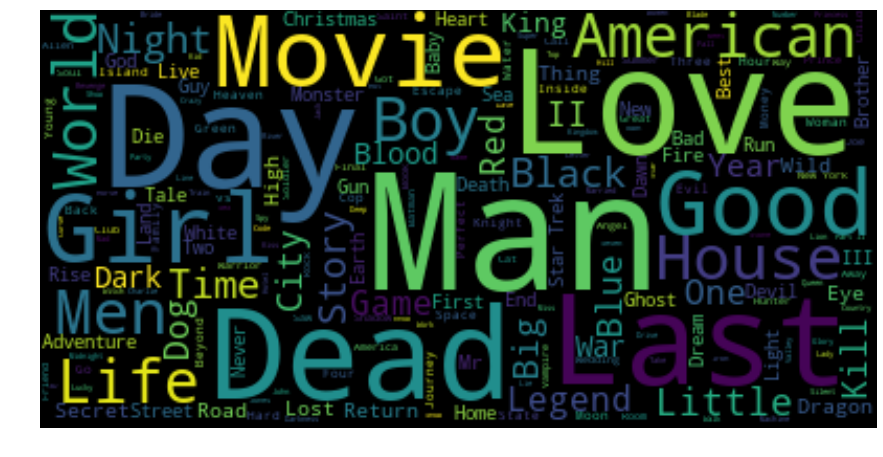

In [102]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(title_corpus)
plt.figure(figsize=(15,15))# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

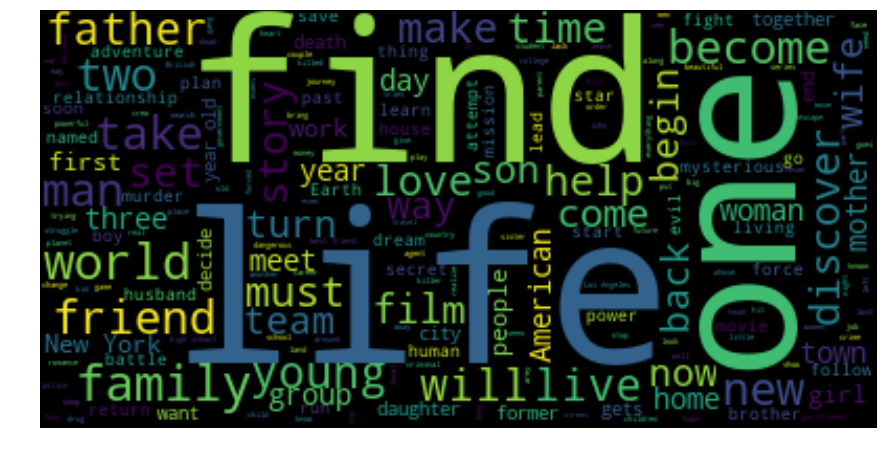

In [103]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(overview_corpus)
plt.figure(figsize=(15,15))# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

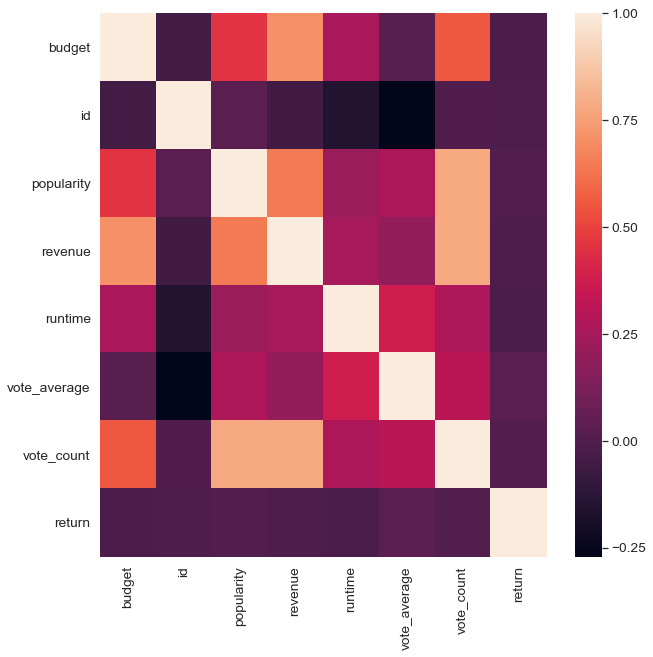

In [104]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr())
plt.show()

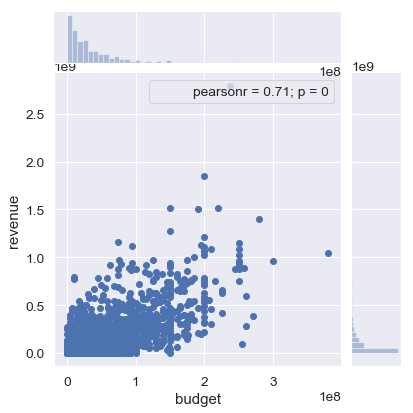

In [105]:
from scipy.stats import pearsonr

sns.jointplot(x='budget', y='revenue', stat_func =pearsonr,data=df2)

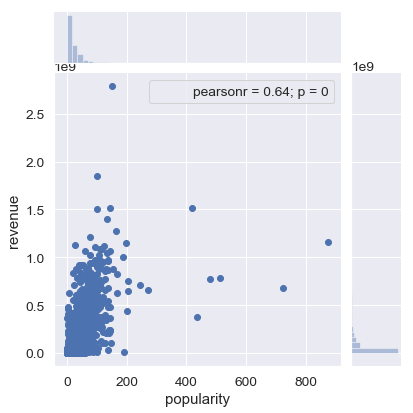

In [106]:

sns.jointplot(x='popularity', y='revenue', stat_func =pearsonr,data=df2)

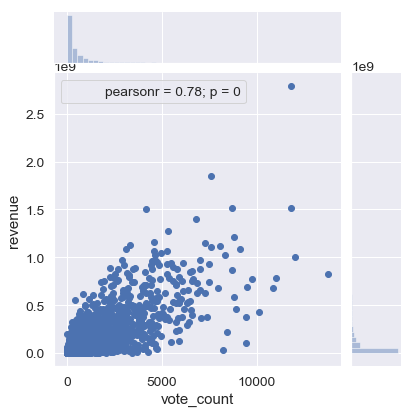

In [107]:

sns.jointplot(x='vote_count', y='revenue', stat_func =pearsonr,data=df2)

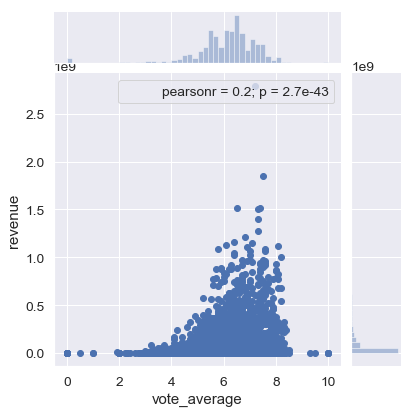

In [108]:
sns.jointplot(x='vote_average', y='revenue', stat_func =pearsonr,data=df2)

In [109]:
df2['production_countries'] = df2['production_countries'].fillna('[]').apply(ast.literal_eval)
df2['production_countries'] = df2['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [110]:
s = df2.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [111]:
con_df = df2.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head()

,num_movies,country
0,3956,United States of America
1,636,United Kingdom
2,324,Germany
3,306,France
4,261,Canada


In [112]:
df2['production_companies'] = df2['production_companies'].fillna('[]').apply(ast.literal_eval)
df2['production_companies'] = df2['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [113]:
# df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
# df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [114]:
s = df2.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [115]:
com_df = df2.drop('production_companies', axis=1).join(s)


In [116]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [117]:
com_pivot.sort_values('Total', ascending=False).head(10)


,Total,Average,Number
Warner Bros.,49155747874,1.540933e+08,319
Universal Pictures,42588465942,1.369404e+08,311
Paramount Pictures,40878523165,1.434334e+08,285
Twentieth Century Fox Film Corporation,39357151309,1.772845e+08,222
Walt Disney Pictures,28683256048,2.516075e+08,114
Columbia Pictures,28599634775,1.422867e+08,201
New Line Cinema,19444865804,1.178477e+08,165
Amblin Entertainment,16090835147,3.283844e+08,49
DreamWorks SKG,14384533626,1.820827e+08,79
Dune Entertainment,13797504190,2.338560e+08,59


In [118]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)


,Total,Average,Number
Pixar Animation Studios,9809792788,6.131120e+08,16
Revolution Sun Studios,8287833697,5.179896e+08,16
Lucasfilm,6606736700,4.404491e+08,15
DreamWorks Animation,12751011861,4.113230e+08,31
Marvel Enterprises,6028164680,3.767603e+08,16
Jerry Bruckheimer Films,7213427769,3.434966e+08,21
Legendary Pictures,11338297127,3.334793e+08,34
Amblin Entertainment,16090835147,3.283844e+08,49
TSG Entertainment,8189981305,3.033326e+08,27
1492 Pictures,5054988252,2.973523e+08,17


In [119]:
df2['original_language'].drop_duplicates().shape[0]


37

In [120]:
lang_df = pd.DataFrame(df2['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,4505,en
fr,70,fr
es,32,es
zh,27,zh
de,27,de


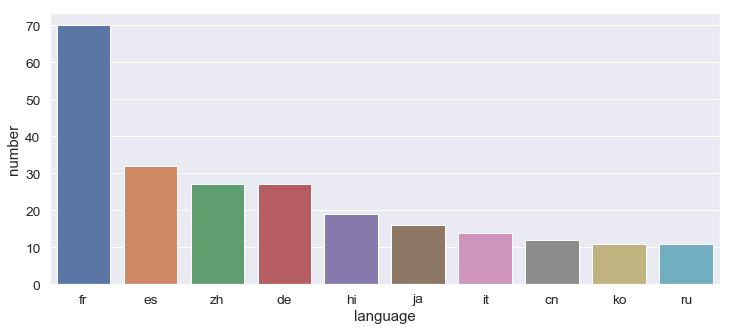

In [121]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [122]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [123]:
df2['popularity'] = df2['popularity'].apply(clean_numeric).astype('float')
df2['vote_count'] = df2['vote_count'].apply(clean_numeric).astype('float')
df2['vote_average'] = df2['vote_average'].apply(clean_numeric).astype('float')

In [124]:
df2['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

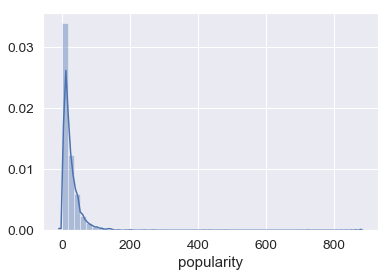

In [125]:
sns.distplot(df2['popularity'].fillna(df2['popularity'].median()))
plt.show()

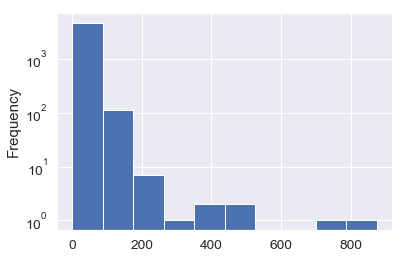

In [126]:
df2['popularity'].plot(logy=True, kind='hist')

In [127]:
df2[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)


,title,popularity,year
546,Minions,875.581305,2015
95,Interstellar,724.247784,2014
788,Deadpool,514.569956,2016
94,Guardians of the Galaxy,481.098624,2014
127,Mad Max: Fury Road,434.278564,2015
28,Jurassic World,418.708552,2015
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003
82,Dawn of the Planet of the Apes,243.791743,2014
200,The Hunger Games: Mockingjay - Part 1,206.227151,2014
88,Big Hero 6,203.734590,2014


In [128]:
df2['vote_count'].describe()


count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [129]:
df2[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)


,title,vote_count,year
96,Inception,13752.0,2010
65,The Dark Knight,12002.0,2008
0,Avatar,11800.0,2009
16,The Avengers,11776.0,2012
788,Deadpool,10995.0,2016
95,Interstellar,10867.0,2014
287,Django Unchained,10099.0,2012
94,Guardians of the Galaxy,9742.0,2014
426,The Hunger Games,9455.0,2012
127,Mad Max: Fury Road,9427.0,2015


In [130]:
df2['vote_average'] = df2['vote_average'].replace(0, np.nan)
df2['vote_average'].describe()

count    4740.000000
mean        6.173143
std         0.972684
min         0.500000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

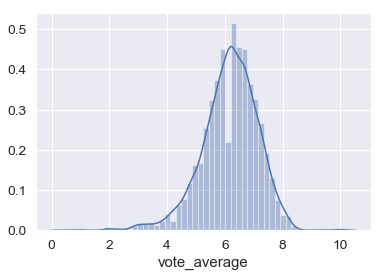

In [131]:
sns.distplot(df2['vote_average'].fillna(df2['vote_average'].median()))


In [132]:
df2[df2['vote_count'] > 3000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
1881,The Shawshank Redemption,8.5,8205.0,1994
3337,The Godfather,8.4,5893.0,1972
3865,Whiplash,8.3,4254.0,2014
2294,Spirited Away,8.3,3840.0,2001
1818,Schindler's List,8.3,4329.0,1993
3232,Pulp Fiction,8.3,8428.0,1994
662,Fight Club,8.3,9413.0,1999
2731,The Godfather: Part II,8.3,3338.0,1974
809,Forrest Gump,8.2,7927.0,1994
690,The Green Mile,8.2,4048.0,1999


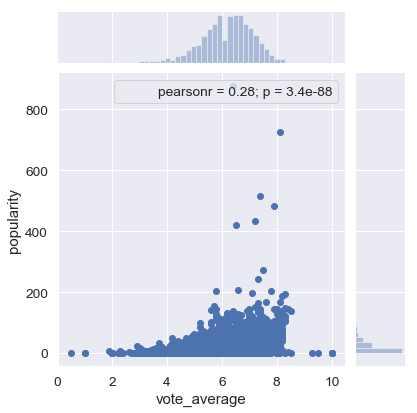

In [133]:

sns.jointplot(x='vote_average', y='popularity', stat_func =pearsonr,data=df2)


In [135]:
# sns.barplot(x="popularity", y="revenue", hue='genre',data=df2)

In [137]:
df2['genres'] = df2['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [138]:
s = df2.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [139]:
gen_df = df2.drop('genres', axis=1).join(s)
df2.head()

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,return,year
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009
1,300000000.0,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007
2,245000000.0,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,Released,A Plan No One Escapes,Spectre,6.3,4466.0,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015
3,250000000.0,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012
4,260000000.0,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012


In [141]:
gen_df['genre'].value_counts().shape[0]


20

In [142]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


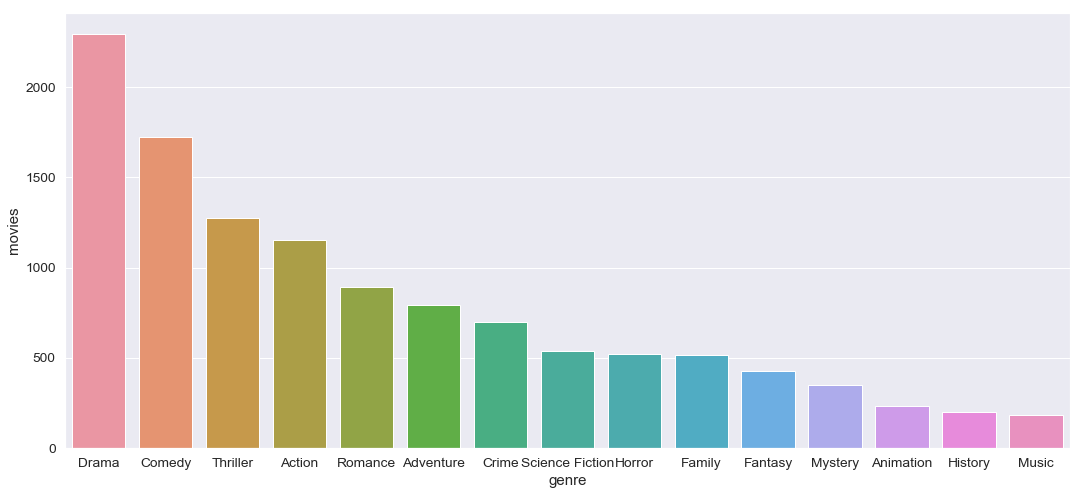

In [145]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [156]:
res = df2.set_index(['popularity', 'revenue'])['genres'].apply(pd.Series).stack()
res = res.reset_index()
res.columns = ['popularity','revenue','sample_num','genre']
res.drop('sample_num',axis=1,inplace=True)
res

,popularity,revenue,genre
0,150.437577,2787965087,Action
1,150.437577,2787965087,Adventure
2,150.437577,2787965087,Fantasy
3,150.437577,2787965087,Science Fiction
4,139.082615,961000000,Adventure
5,139.082615,961000000,Fantasy
6,139.082615,961000000,Action
7,107.376788,880674609,Action
8,107.376788,880674609,Adventure
9,107.376788,880674609,Crime


In [160]:
res_400=res[res['revenue']>=400000000]

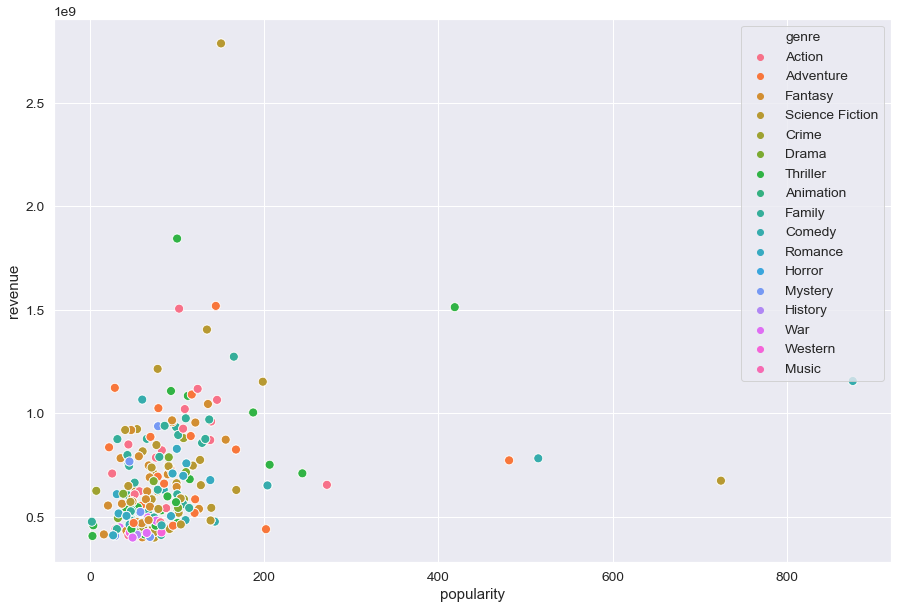

In [168]:
plt.figure(figsize=(15,10 ))
sns.scatterplot(x="popularity", y="revenue", hue='genre',data=res_400,s=80)

<Figure size 1080x720 with 0 Axes>

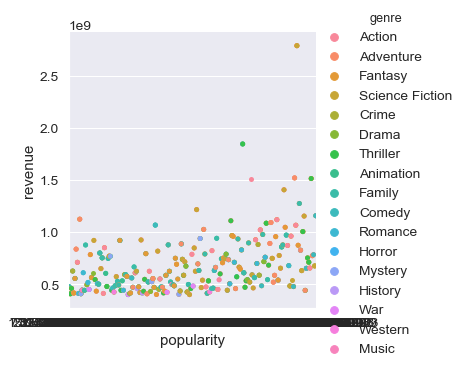

In [164]:
plt.figure(figsize=(15,10 ))
sns.catplot(x="popularity", y="revenue", hue='genre',data=res_400)